#Loan Application
SZE bank want to identified the loan application to filter the people who can be granted loans and need to be rejected is a tedious and time-consuming process. So, I am going to help the SZE bank to make a machine learning model to predict whether the people will get a loan or not.

Ari Sulistiyo Prabowo - Data Scientist

__________

Here I provide the list of content on this notebook:


**Data Preparation**
- Import library and load the dataset 
- Brief information from dataset such as null values and data types
- Take care the null values

**Exploratory Data Analysis**
- Perform descriptive statistic between categorical and numerical variable
- Perform correlation

**Data pre-processing**
- Drop any duplicate values
- Perform one-hot encoding

**Modelling**
- LogisticRegression
- Random Forest
- Decision Tree
- Gradient Boosting
- XGBoost

___

#**Data Preparation**

In [502]:
#Import library
import pandas as pd
import numpy as np

#Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_importance


#import class imbalance library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [458]:
#load the dataset
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


##Brief information on the data

In [459]:
#brief information on the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


there are 1 unnamed variable and 13 variables. Some of the variables contain null values

In [460]:
#brief description on the data
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In terms of numerical variables, there are six numerical variables that are related with loan application. The numerical variables look normal data.

In [461]:
#exclude the unnamed variable
data = loan_data.iloc[:, 1:]

#show null values and its percentage
null_val = pd.DataFrame(data.dtypes).T.rename(index = {0:'Columns Type'})
null_val = null_val.append(pd.DataFrame(data.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null_val = null_val.append(pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2)).T.rename(index = {0:'Percentage of Null Values'}))
null_val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Columns Type,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,int64
Amount of Null Values,0,10,1,9,0,29,0,0,16,13,43,0,0
Percentage of Null Values,0,2.04,0.2,1.83,0,5.91,0,0,3.26,2.65,8.76,0,0


Based on the percentage of null values above, it shows that the null values is under than 10% or minor null values. So, in the next section I will decide to fill the null values with the median (if numerical) and the most appear (if categorical)

##Take care the missing value

There are two types of variable such as categorical and numerical. So, I take care both of variables that include null values

In terms of categorical variable + binary variable including **Loan_ID, Gender, Married, Dependents, Self Employer, and Credit History**. 

In terms of numerical variable, it includes **Loan Amount, Loan Amount Term**

In [462]:
#impute the missing values
#categorical variable + binary variable
cat_var = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in cat_var:
  mean_imputer = mean_imputer.fit(data[[i]])
  data[i] = mean_imputer.transform(data[[i]]).ravel()

#numerical variable
num_var = ['LoanAmount','Loan_Amount_Term']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in num_var:
  mean_imputer = mean_imputer.fit(data[[i]])
  data[i] = mean_imputer.transform(data[[i]]).ravel()

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#**Exploratory Data Analysis**

###Numerical variable

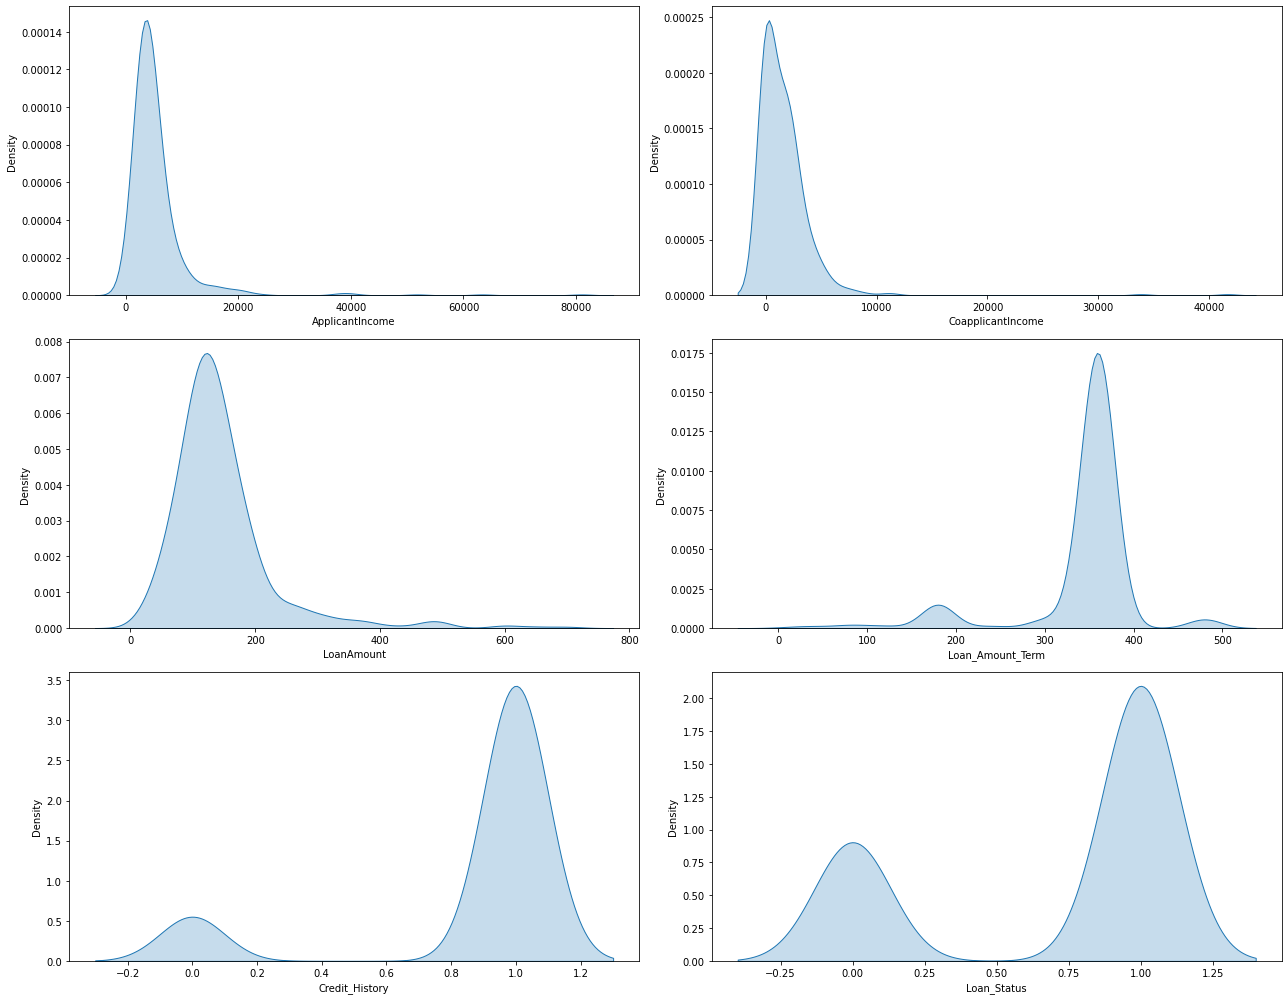

In [463]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
            'Credit_History', 'Loan_Status']
fig, axes = plt.subplots(3,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

Based on the above chart, I could summarize that:
- In terms of Applicant Income, the applicant mostly earn between 150 until 10000
- In terms of co applicant income, the co applicant mostly earn between 0 until 7500
- In terms of loan amount, applicant mostly request 17 - 300 
- In terms of loan amount term, the applicant mostly pay the loan in one year (365 days)
- In terms of credit history, the applicant mostly pay the debt
- The last one, the applicant mostly are granted to have a loan.

###Categorical Variable

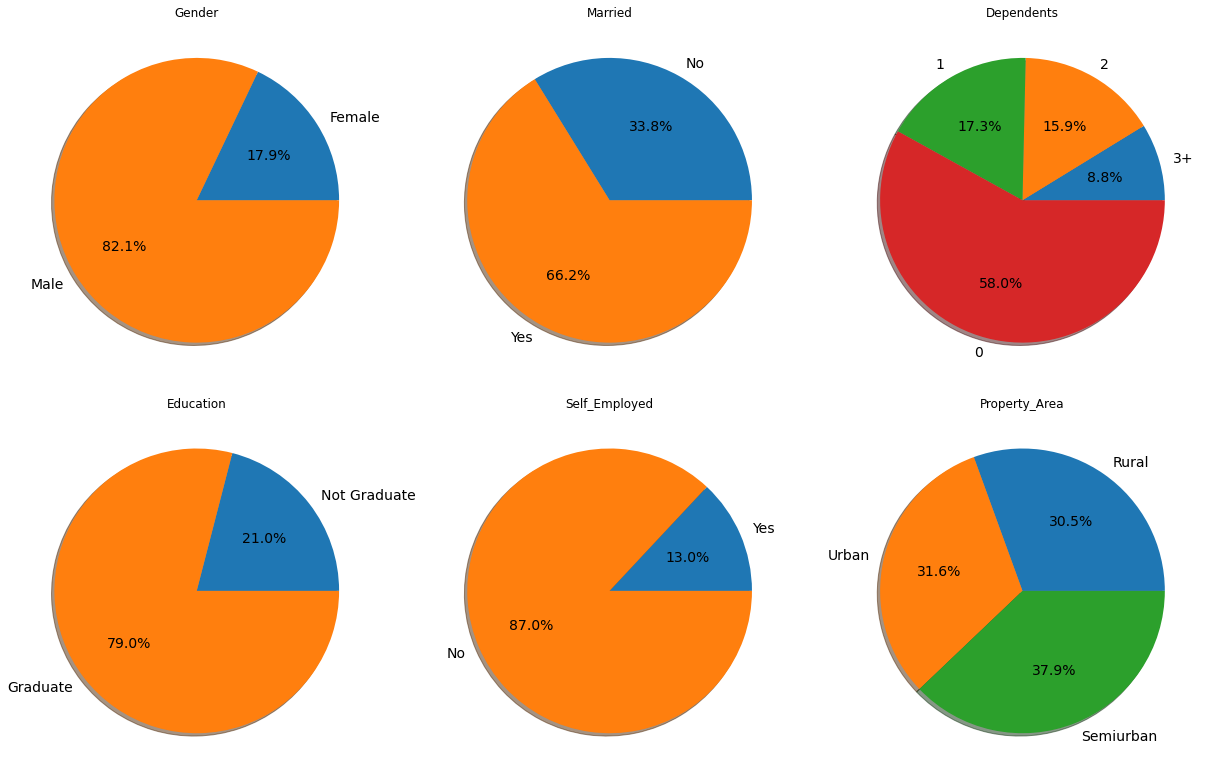

In [464]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

fig, axes = plt.subplots(2,3, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

The above chart, we can summarize:
- Gender, the applicant mostly are Male
- Married, the applicant mostly get a married
- Dependents, the applcant mostly independent
- Education, the applicant mostly have an education
- Self_employed, the applicant mostly an employee
- The last one, the applicant is well distributed in Semiurban, Rural, and Urban

###Correlation of numerical variables

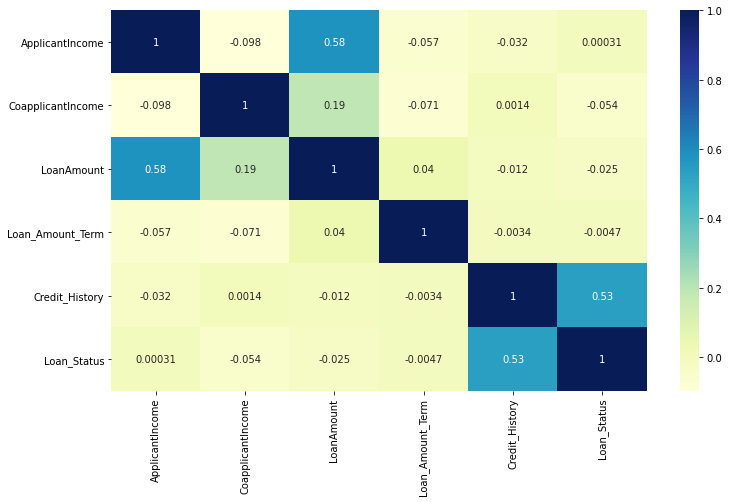

In [465]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In this correlation performance, it shows that loan status is accepted or rejected because of the credit history around **53%**. The high or loan amount is obtained due to the high or low of applicant's income around **58%**.

I personally agree with this two high correlation. Let's move to the modelling section

#**Data Pre-processing**

###Drop any duplicate values

In [466]:
#Drop the duplicate data point
print('Before dropping the duplicate values',data.shape)
data_new = data.drop_duplicates()
print('After dropping the duplicate values',data_new.shape)

Before dropping the duplicate values (491, 13)
After dropping the duplicate values (491, 13)


There is no duplicate values in the dataset

###Perform one-hot encoding

Before performing one-hot encoding, there is one variable that we don't need to use in our model, it is Loan ID. So, I drop this columns

In [467]:
#dropping the Loan ID
print('Before dropping',data.shape)
data = data.drop(columns=['Loan_ID'])
print('After dropping',data.shape)

Before dropping (491, 13)
After dropping (491, 12)


In [468]:
#performing one-hot encoding
print('Before doing one-hot encoding',data.shape)
data_dumm = pd.get_dummies(data, prefix_sep='_')
print('Before doing one-hot encoding',data_dumm.shape)
data_dumm.head()

Before doing one-hot encoding (491, 12)
Before doing one-hot encoding (491, 21)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.000000,1.0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.000000,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.000000,1.0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,341.297071,1.0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.000000,1.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [469]:
#Separate the target and independent variable
X = data_dumm.drop(columns='Loan_Status')
y = data_dumm['Loan_Status']

#Perform train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

#**Modelling**

In [470]:
class Class(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict_test(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Testing Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))
        print()
        print(classification_report(Y, self.predictions))
        
        
    def grid_predict_train(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Training Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))

###Logistic Regression

In [471]:
lr = Class(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2, 2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = y_train)
lr.grid_predict_train(X_train, y_train)
lr.grid_predict_test(X_test, y_test)

Training Accuracy: 80.17%
Testing Accuracy: 83.11%

              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.83      0.96      0.89       105

    accuracy                           0.83       148
   macro avg       0.84      0.74      0.76       148
weighted avg       0.83      0.83      0.82       148



###Random Forest

In [472]:
rf = Class(clf = RandomForestClassifier)
param_grid = {'criterion': ['entropy','gini'], 
              'n_estimators': [20, 40, 60, 80, 100], 
              'max_features': ['sqrt','log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = y_train)
rf.grid_predict_train(X_train, y_train)
rf.grid_predict_test(X_test, y_test)

Training Accuracy: 100.00%
Testing Accuracy: 79.05%

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.80      0.93      0.86       105

    accuracy                           0.79       148
   macro avg       0.77      0.69      0.71       148
weighted avg       0.78      0.79      0.77       148



### Decision Tree

In [473]:
dt = Class(clf = DecisionTreeClassifier)
dt.grid_search(parameters = [{'criterion':['entropy', 'gini'], 
                             'max_features': ['sqrt', 'log2']}], Kfold = 5)
dt.grid_fit(X = X_train, Y = y_train)
dt.grid_predict_train(X_train, y_train)
dt.grid_predict_test(X_test, y_test)

Training Accuracy: 100.00%
Testing Accuracy: 71.62%

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        43
           1       0.80      0.80      0.80       105

    accuracy                           0.72       148
   macro avg       0.66      0.66      0.66       148
weighted avg       0.72      0.72      0.72       148



### KNN Classifier

In [474]:
knn = Class(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = y_train)
knn.grid_predict_train(X_train, y_train)
knn.grid_predict_test(X_test, y_test)

Training Accuracy: 69.39%
Testing Accuracy: 70.95%

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.71      1.00      0.83       105

    accuracy                           0.71       148
   macro avg       0.35      0.50      0.42       148
weighted avg       0.50      0.71      0.59       148



###Gradient Boosting

In [475]:
gb = Class(clf = GradientBoostingClassifier)
param_grid = {'n_estimators': [20, 40, 60, 80, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = y_train)
gb.grid_predict_train(X_train, y_train)
gb.grid_predict_test(X_test, y_test)

Training Accuracy: 82.80%
Testing Accuracy: 82.43%

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.81      0.98      0.89       105

    accuracy                           0.82       148
   macro avg       0.86      0.71      0.74       148
weighted avg       0.84      0.82      0.80       148



###XGboost

In [476]:
# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

xgb_prediction = xgb_model.predict(X_test)
xgb_training = xgb_model.predict(X_train)

xgb_train = accuracy_score(y_train, xgb_training)
xgb_ac = accuracy_score(y_test, xgb_prediction)
xgb_fscore = f1_score(y_test ,xgb_prediction)

print("XGB Baseline Training Model Accuracy: {:.2f}%".format(xgb_train*100))
print("XGB Baseline Testing Model Accuracy: {:.2f}%".format(xgb_ac*100))
print("XGB Baseline Testing Model F1 Score: {:.2f}%".format(xgb_fscore*100))

XGB Baseline Training Model Accuracy: 88.92%
XGB Baseline Testing Model Accuracy: 81.08%
XGB Baseline Testing Model F1 Score: 87.72%


**Summarize from the model**

I use decision tree and random forest, it shows that the model is overfitting which we can see the training data that the model can predict 100% of the training data.

Logistic regression and KNN Classifier show not a good model to predict, because they have low score in predicting the test data.

Gradient boosting and XGboost are good model, but I decide to choose XGBoost in order to choose the best f1 score even if in predicting test data the gradient boosting gives slightly better than XGboost. However, f1 score from XGboost is better than gradient boosting

#**Predict Test Data**

In [477]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [478]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [480]:
#@title Default title text
#impute the missing values
#categorical variable + binary variable
cat_var = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in cat_var:
  mean_imputer = mean_imputer.fit(test_data[[i]])
  test_data[i] = mean_imputer.transform(test_data[[i]]).ravel()

#numerical variable
num_var = ['LoanAmount','Loan_Amount_Term']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in num_var:
  mean_imputer = mean_imputer.fit(test_data[[i]])
  test_data[i] = mean_imputer.transform(test_data[[i]]).ravel()

test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [481]:
#drop the Loan ID
test_data = test_data.drop(columns='Loan_ID')

In [482]:
#apply one-hot encoding
print('Before doing one-hot encoding',test_data.shape)
test = pd.get_dummies(test_data, prefix_sep='_')
print('Before doing one-hot encoding',test.shape)
test.head()

Before doing one-hot encoding (123, 11)
Before doing one-hot encoding (123, 20)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3748,1668.0,110.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0
1,4000,7750.0,290.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,2625,6250.0,187.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
3,3902,1666.0,109.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
4,6096,0.0,218.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0


In [512]:
param_grid = {'criterion': ['entropy','gini'], 
              'n_estimators': [20, 40, 60, 80, 100], 
              'max_features': ['sqrt','log2']}
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf.fit(X_train, y_train)
print(rf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


In [509]:
#prediction
prediction = rf.predict(test)


In [510]:
result = pd.DataFrame(prediction)
result.index = test_data.index
result.columns = ['prediction']
result.shape

(123, 1)

In [511]:
# #download
# from google.colab import files
# result.to_csv('prediction_result.csv', index=False)
# files.download('prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>